In [1]:
%pylab inline
%matplotlib inline

import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import csv_dic_df

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")

import paths
import my_plot
import scrap_espn_gamecast


from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF
from useful_methods import PreprocessingTweet
from useful_methods import EmolexDic
from useful_methods import CreateEmolexDF

Populating the interactive namespace from numpy and matplotlib


In [5]:
dic_emolex, dic_emolex_stemmed = EmolexDic()

All Words: 14182


In [88]:
# choosing data
week = str(15)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Arsenal_vs_Sunderland.csv',
 'Chelsea_vs_Bournemouth.csv',
 'Everton_vs_Crystal.csv',
 'Newcastle_vs_Liverpool.csv',
 'Southampton_vs_Villa.csv',
 'Stoke_vs_City.csv',
 'Swansea_vs_Leicester.csv',
 'United_vs_WestHam.csv',
 'Watford_vs_Norwich.csv',
 'WestBromwich_vs_Tottenham.csv']

In [7]:
GW = 'GW' + week
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filenames[-3])
df.head()

,date,ith_minute,side,status,tags,text,text_status,user,user_status
0,Sun Dec 13 15:56:40 +0000 2015,-3,home,tweet,coys,Hear that music??? Buzzing! #COYS,normal,ztranche,normal
1,Sun Dec 13 15:56:40 +0000 2015,-3,home,retweet,coys,The players are in the tunnel. Five minutes un...,normal,aimeeroseclarke,normal
2,Sun Dec 13 15:56:40 +0000 2015,-3,home,retweet,coys,ICYMI: A reminder of our team for today's game...,normal,brebrov,normal
3,Sun Dec 13 15:56:40 +0000 2015,-3,both,tweet,"coys,thfc,nufc",Live HD Stream : Tottenham vs Newcastle United...,stream,onsball_live_hd,normal
4,Sun Dec 13 15:56:41 +0000 2015,-3,home,tweet,"spurs,coys",Come on you #SPURS #COYS,normal,thetequilaman,normal


In [8]:
# [Filter] DF
dfFilter = FilterDF(df)

In [9]:
# [Filtered] All, Non-Retweet
dfFilterEmolex = CreateEmolexDF(dfFilter, dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRetweet = CreateEmolexDF(dfFilter[dfFilter['status'] != 'retweet'], dic_emolex, dic_emolex_stemmed)

In [10]:
# [Filtered] Home, Away
dfFilterEmolexHome = CreateEmolexDF(dfFilter[dfFilter['side'] == 'home'], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexAway = CreateEmolexDF(dfFilter[dfFilter['side'] == 'away'], dic_emolex, dic_emolex_stemmed)

In [11]:
# [Filtered, Non ReTweet] Home, Away
dfFilterEmolexNonRtHome = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRtAway = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)

In [2]:
# Scrap Gamecast
# url = 'http://www.espnfc.us/gamecast/422508/gamecast.html' # Bournemouth_vs_United
url = 'http://www.espnfc.us/gamecast/422509/gamecast.html' # Tottenham_vs_Newcastle
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

[Match]: Tottenham Hotspur VS Newcastle United
[Scrap Done]: 31.25 sec


In [30]:
dfGameCast

,minute,comment,side,comment_status
0,,First Half begins.,neutral,neutral
1,,Lineups are announced and players are warming up.,neutral,neutral
2,1,Attempt saved. Harry Kane (Tottenham Hotspur) ...,home,attemp
3,2,"Corner, Tottenham Hotspur. Conceded by Paul D...",home,corner
4,4,"Offside, Newcastle United. Moussa Sissoko trie...",away,offside
5,5,Attempt blocked. Siem de Jong (Newcastle Unite...,away,attemp
6,8,Christian Eriksen (Tottenham Hotspur) wins a f...,home,freekick
7,8,Foul by Moussa Sissoko (Newcastle United).,away,foul
8,9,Attempt blocked. Erik Lamela (Tottenham Hotspu...,home,attemp
9,10,Attempt missed. Eric Dier (Tottenham Hotspur) ...,home,attemp


In [81]:
def AddHtMinute(minute):
    minute = int(minute)
    
    # adding HT 15 min and Referee's ET 3 min
    if minute > 45:
        minute = minute + 15 + 3
    return minute


def AttackMinutes(dfGameCast, side):
    # filter attack comments
    attack_minutes = list(dfGameCast[
            (
                (dfGameCast.comment_status == 'corner') |
                (dfGameCast.comment_status == 'offside') |
                (dfGameCast.comment_status == 'freekick') |
                (dfGameCast.comment_status == 'attemp')
            ) 
            & (dfGameCast.side == side)
             ]['minute'])

    # convert to integer and unique minutes
    attack_minutes = [AddHtMinute(minute) for minute in attack_minutes]
    attack_minutes = list(set(attack_minutes))
    attack_minutes.sort()
    
    # create dic for plot
    attacks_dic = {
        'xdata': attack_minutes,
        'ydata': [25] * len(attack_minutes),
        'types': 'k^',
        'label': 'attack',
    }
    
    return attacks_dic

def FoulMinutes(dfGameCast, side):
    # filter foul comments
    foul_minutes = list(dfGameCast[
            (dfGameCast.comment_status == 'foul') &
            (dfGameCast.side == side)
             ]['minute'])

    # convert to integer and unique minutes
    foul_minutes = [AddHtMinute(minute) for minute in foul_minutes]
    foul_minutes = list(set(foul_minutes))
    foul_minutes.sort()
    
    # create dic for plot
    fouls_dic = {
        'xdata': foul_minutes,
        'ydata': [45] * len(foul_minutes),
        'types': 'ks',
        'label': 'foul',
    }
    
    return fouls_dic

def GoalMinutes(dfGameCast):
    goal_minutes = list(dfGameCast[dfGameCast['comment_status'] == 'goal']['minute'])

    goal_minutes = list(map(lambda minute: AddHtMinute(minute), goal_minutes))
    goal_minutes.sort()
    
    goals_dic = {
        'xdata': goal_minutes,
        'ydata': [5] * len(goal_minutes),
        'types': 'co',
        'label': 'goal',
    }
    
    return goals_dic


attacks_dic_home = AttackMinutes(dfGameCast, 'home')
attacks_dic_away = AttackMinutes(dfGameCast, 'away')

fouls_dic_home = FoulMinutes(dfGameCast, 'home')
fouls_dic_away = FoulMinutes(dfGameCast, 'away')

goals_dic = GoalMinutes(dfGameCast)

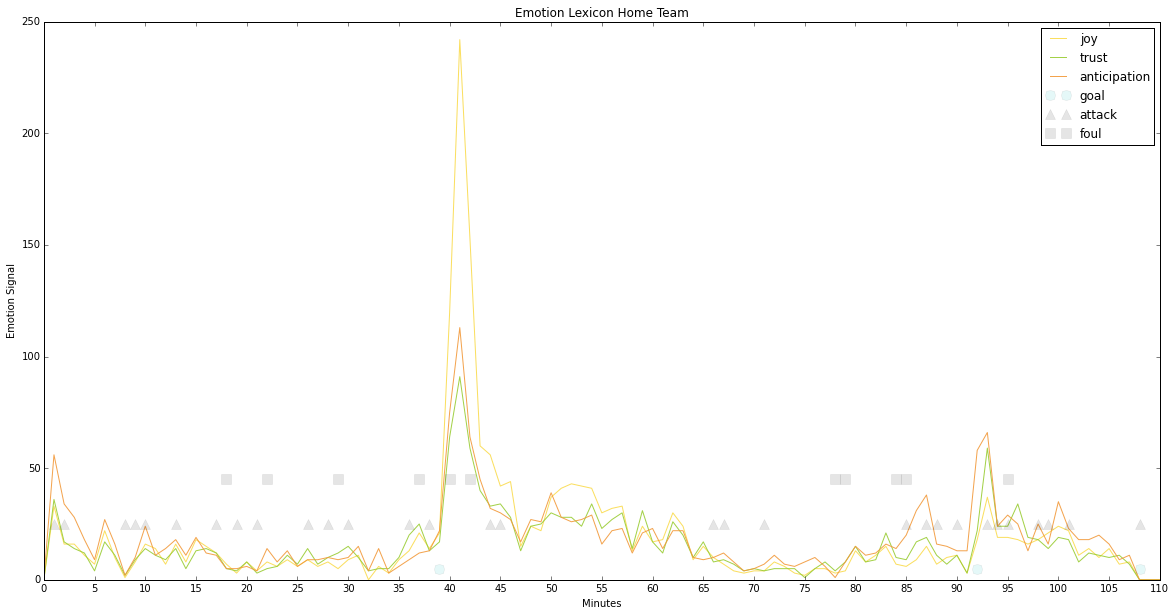

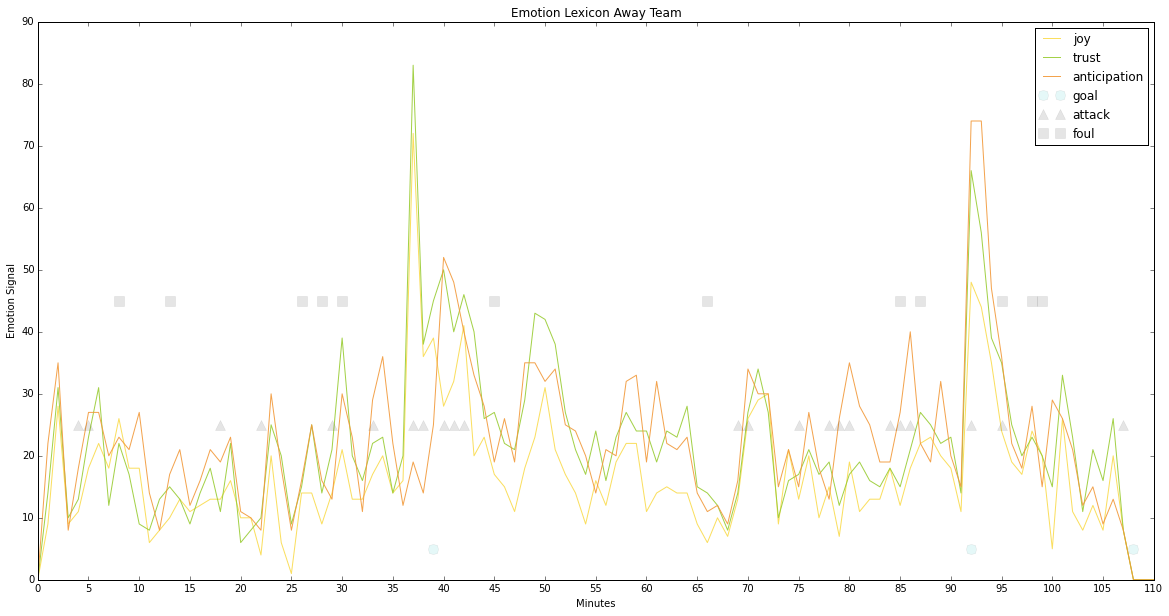

In [93]:
categorys = ['joy', 'trust', 'anticipation']
colors = ['#fadb4d', '#99cc33', '#f2993a']

PlotLineMultipleChart(
    my_list_list=[
        list(dfFilterEmolexHome[categorys[0]]),
        list(dfFilterEmolexHome[categorys[1]]),
        list(dfFilterEmolexHome[categorys[2]]),
    ],
    labels=categorys,
    colors=colors,
    title='Emotion Lexicon' + ' Home Team',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
    xlim=False,
    ylim=False,
    x_interval=5,
    y_interval=False,
    points=[goals_dic, attacks_dic_home, fouls_dic_home],
)


PlotLineMultipleChart(
    my_list_list=[
        list(dfFilterEmolexAway[categorys[0]]),
        list(dfFilterEmolexAway[categorys[1]]),
        list(dfFilterEmolexAway[categorys[2]]),
    ],
    labels=categorys,
    colors=colors,
    title='Emotion Lexicon' + ' Away Team',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
    xlim=False,
#     ylim=[0, 250],
    x_interval=5,
    y_interval=False,
    points=[goals_dic, attacks_dic_away, fouls_dic_away],
)

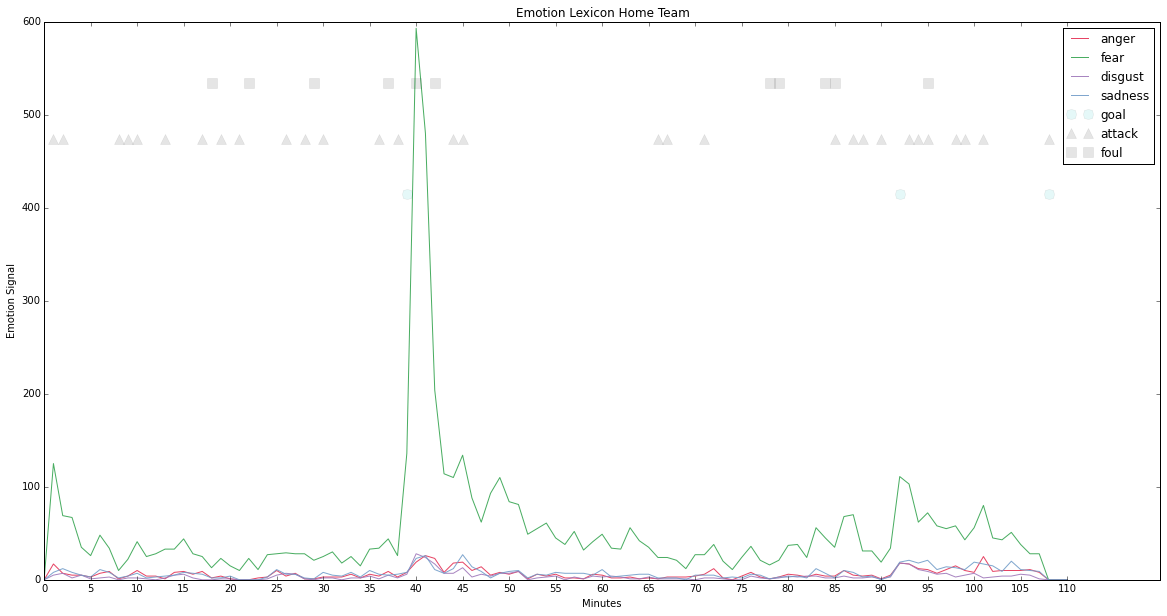

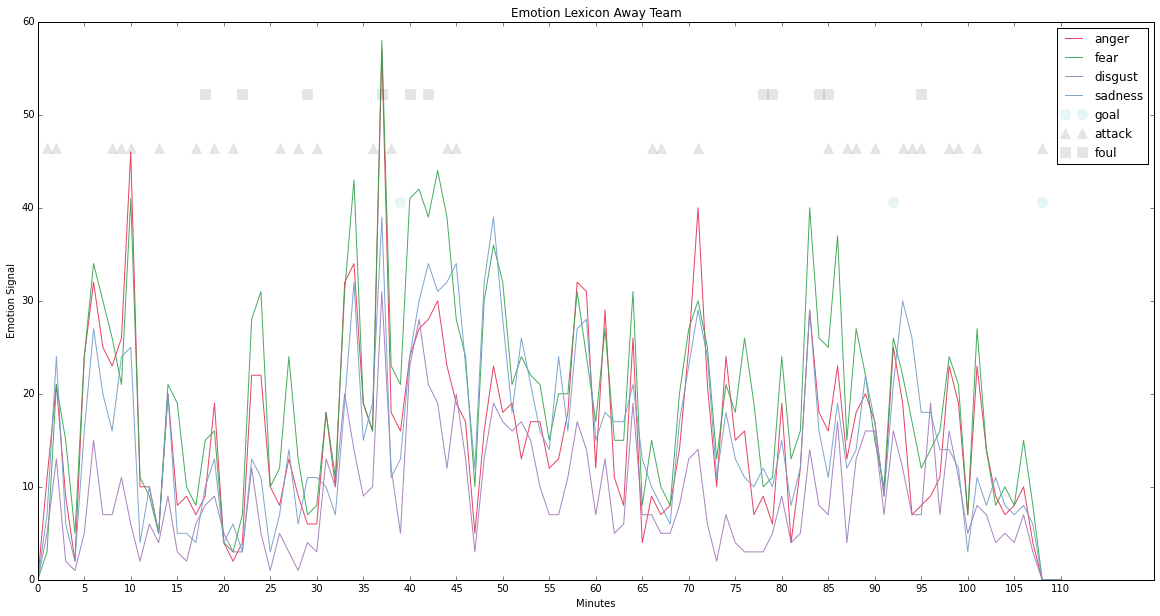

In [107]:
categorys = ['anger', 'fear', 'disgust', 'sadness']
colors = ['#e43054', '#35a450', '#9f78ba', '#729dc9']

PlotLineMultipleChart(
    my_list_list=[
        list(dfFilterEmolexHome[categorys[0]]),
        list(dfFilterEmolexHome[categorys[1]]),
        list(dfFilterEmolexHome[categorys[2]]),
        list(dfFilterEmolexHome[categorys[3]]),
    ],
    labels=categorys,
    colors=colors,
    title='Emotion Lexicon' + ' Home Team',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
    xlim=False,
    ylim=False,
    x_interval=5,
    y_interval=False,
    points=[goals_dic, attacks_dic_home, fouls_dic_home],
)


PlotLineMultipleChart(
    my_list_list=[
        list(dfFilterEmolexAway[categorys[0]]),
        list(dfFilterEmolexAway[categorys[1]]),
        list(dfFilterEmolexAway[categorys[2]]),
        list(dfFilterEmolexAway[categorys[3]]),
    ],
    labels=categorys,
    colors=colors,
    title='Emotion Lexicon' + ' Away Team',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
    xlim=False,
    ylim=False,
    x_interval=5,
    y_interval=False,
    points=[goals_dic, attacks_dic_home, fouls_dic_home],
)

In [106]:
# plot multiple data series
def PlotLineMultipleChart(my_list_list, labels, colors, title, xlabel, ylabel,
                        xlim=False, ylim=False, points=False, grid=False, vline=False,
                        x_interval=False, y_interval=False,
                        width=20, height=10):
    # add 0th_minute emotion
    my_list = [0] + my_list_list[0]

    # set plot size
    plt.figure(figsize=(width, height))

    # set subplot
    ax = plt.subplot(1, 1, 1)
    ax.grid(grid)

    # xlims, ylims
    xlim_min = 0
    xlim_max = len(my_list)

    ylim_min = 0
    ylim_max = max(my_list)
    

    # plot each lists
    for i in range(len(my_list_list)):
        # add 0th minute
        my_list = [0] + my_list_list[i]

        # create x, y datas
        xdata = np.arange(len(my_list))
        ydata = my_list
        
        ylim_max = max(max(ydata), ylim_max)

        # plot funtion
        plt.plot(xdata, ydata, label=labels[i], alpha=0.9, color=colors[i])
    
    # plotting points
    if points:
        p_i = 0
        for point in points:
            xdata = point['xdata']
            ydata = [ylim_max * (7 + p_i) / 10] * len(xdata)
            types = point['types']
            label = point['label']
            p_i += 1
            
            # plot points
            plt.plot(xdata, ydata, types, label=label, markersize=10, alpha=0.1)
            
            # plot vertical lines
            if vline:
                for x in xdata:
                    plt.axvline(x, color=types[0], alpha=0.3)

    # setted limit
    if xlim:
        xlim_min, xlim_max = xlim
        ax.set_xlim(xlim_min, xlim_max)
    if ylim:
        ylim_min, ylim_max = ylim
        ax.set_ylim(ylim_min, ylim_max)
    if x_interval:
        plt.xticks(np.arange(xlim_min, xlim_max + 1, x_interval))
    if y_interval:
        plt.yticks(np.arange(ylim_min, ylim_max + 1, y_interval))
    
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()